# Term Project
Team: Analytics<br>
Members: Kesav Adithya Venkidusamy <br>
Course: DSC630 - Predictive Analytics<br>
Instructor: Fadi Alsaleem <br>
Assignment: Week 4

## Income Prediction

<b>Idea</b>: Income prediction is important for a variety of areas in the private and nonprofit sectors. One critical area this affects is marketing, where income segmentation of the population is an extremely important tool. Businesses may make different variations of their items designated for certain subgroups of the population, and these subgroups often include the income of individuals. Income prediction also helps to identify those individuals who are of a lower income that may need the most assistance, who some nonprofits strive to identify and assist. The ability to predict the income of individuals from this information has far-reaching impacts for every industry.

<b>Dataset</b>
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))
https://www.census.gov/en.html

<b>Abstract</b>: Predict whether income exceeds $50K/year based on census data

#### Features and Target present in the dataset

1. Age - The age of an individual, this ranges from 17 to 90.

2. Workclass - The class of work to which an individual belongs.

3. Fnlwgt - The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

4. Education - Highest level of education

5. Education_num - Number of years for which education was taken

6. Marital_Status - Represents the category assigned on the basis of marriage status of a person

7. Occupation - Profession of a person

8. Relationship - Relation of the person in his family

9. Race - Origin background of a person

10. Sex - Gender of a person

11. Capital_gain - Capital gained by a person

12. Capital_loss - Loss of capital for a person

13. Hours_per_week - Number of hours for which an individual works per week

14. Native_Country - Country to which a person belongs

Target:

Income — The target variable, which predicts if the income is higher or lower than 50K$.

### Data Exploration

##### Importing libraries for data processing

In [1]:
## Importing all the libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
import seaborn as sns

##### Source Data Analysis

In [2]:
## Reading input data and create dataframe
income_raw_df = pd.read_csv('dataset/Census_Income.csv')

In [3]:
## Showing few records from the dataframe using head command
income_raw_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
## showing the shape of the dataframe
income_raw_df.shape

(48842, 15)

In [5]:
## Describe the numerical columns present in the dataframe
income_raw_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##### Observation

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.

- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.


In [6]:
## Analyzing the target variable
income_raw_df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#### Observation

The income column is our target variable with 2 values — ‘<=50K’ and ‘>50K’. The count of these values is 37155 and 11687 respectively, suggesting that people with income higher than 50K are significantly less, and our data set is imbalanced considering the target variable.

In [7]:
## Showing the info of the dataframe
income_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## EDA

#### Null Values

In [8]:
## Null values are represented as "?" in the dataset
## Replacing "?" with null values
income_null_df = income_raw_df.replace('?',np.nan)

In [9]:
## Displaying few values from the dataframe
income_null_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
## Printing list of null values present in each column
income_null_df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

##### Observation

1. workclass: There are 7 unique values present for this feature. We had around 2799 null values present in this column which contributes only 5% of total records. The null values are replaced with mode. Majority of the people belong to ‘Private’ sector workclass. The values where ‘Workclass’ is missing, also has ‘Occupation’ missing!

2. occupation: The occupation column contains 14 different categories, and have missing values (which we have already observed, and combined with ‘Workclass’ column). The values are replaced with mode.

3. native-country: The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers. We also have 857 missing values in this column, which are replaced with mode.

In [11]:
## Analyzing extra null values present in occupation
## Occupation is null but workclass is not null
income_null_df[income_null_df.workclass.notnull() & income_null_df.occupation.isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8785,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


##### Replacing null values with Mode

In [12]:
## Copying the dataframe to replace with mode
income_mode_df = income_null_df.copy() 

In [13]:
## Replacing the null values with mode value
for col in ['workclass', 'occupation', 'native-country']:
    income_mode_df[col].fillna(income_mode_df[col].mode()[0], inplace=True)

In [14]:
## Printing the few values from mode dataframe
income_mode_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
## Printing the size of mode dataframe
income_mode_df.shape

(48842, 15)

##### Filter Null Values from the dataset

As a 2nd approach, we are planning to filter the null records and perform modeling with this dataset and try to compare the result with the data where null values are replaced with mode 

In [16]:
## Filtering the null values from the dataframe
income_filter_df = income_null_df.dropna()
income_filter_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [17]:
## Calculating the count of records after removing null values
income_filter_df.count()

age                45222
workclass          45222
fnlwgt             45222
education          45222
educational-num    45222
marital-status     45222
occupation         45222
relationship       45222
race               45222
gender             45222
capital-gain       45222
capital-loss       45222
hours-per-week     45222
native-country     45222
income             45222
dtype: int64

In [18]:
## Converting the target column value to 0 and 1 for <=50K and >50K respectively
income_df = income_mode_df.copy(deep=True)
income_df['income'] = np.where(income_df['income'] == '<=50K', 0, 1)
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [19]:
##Calculating the total count for income
income_mode_df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [20]:
##Calculating the total count for income
income_df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

### Visualizations

#### Numerical Data Exploration

##### Histogram

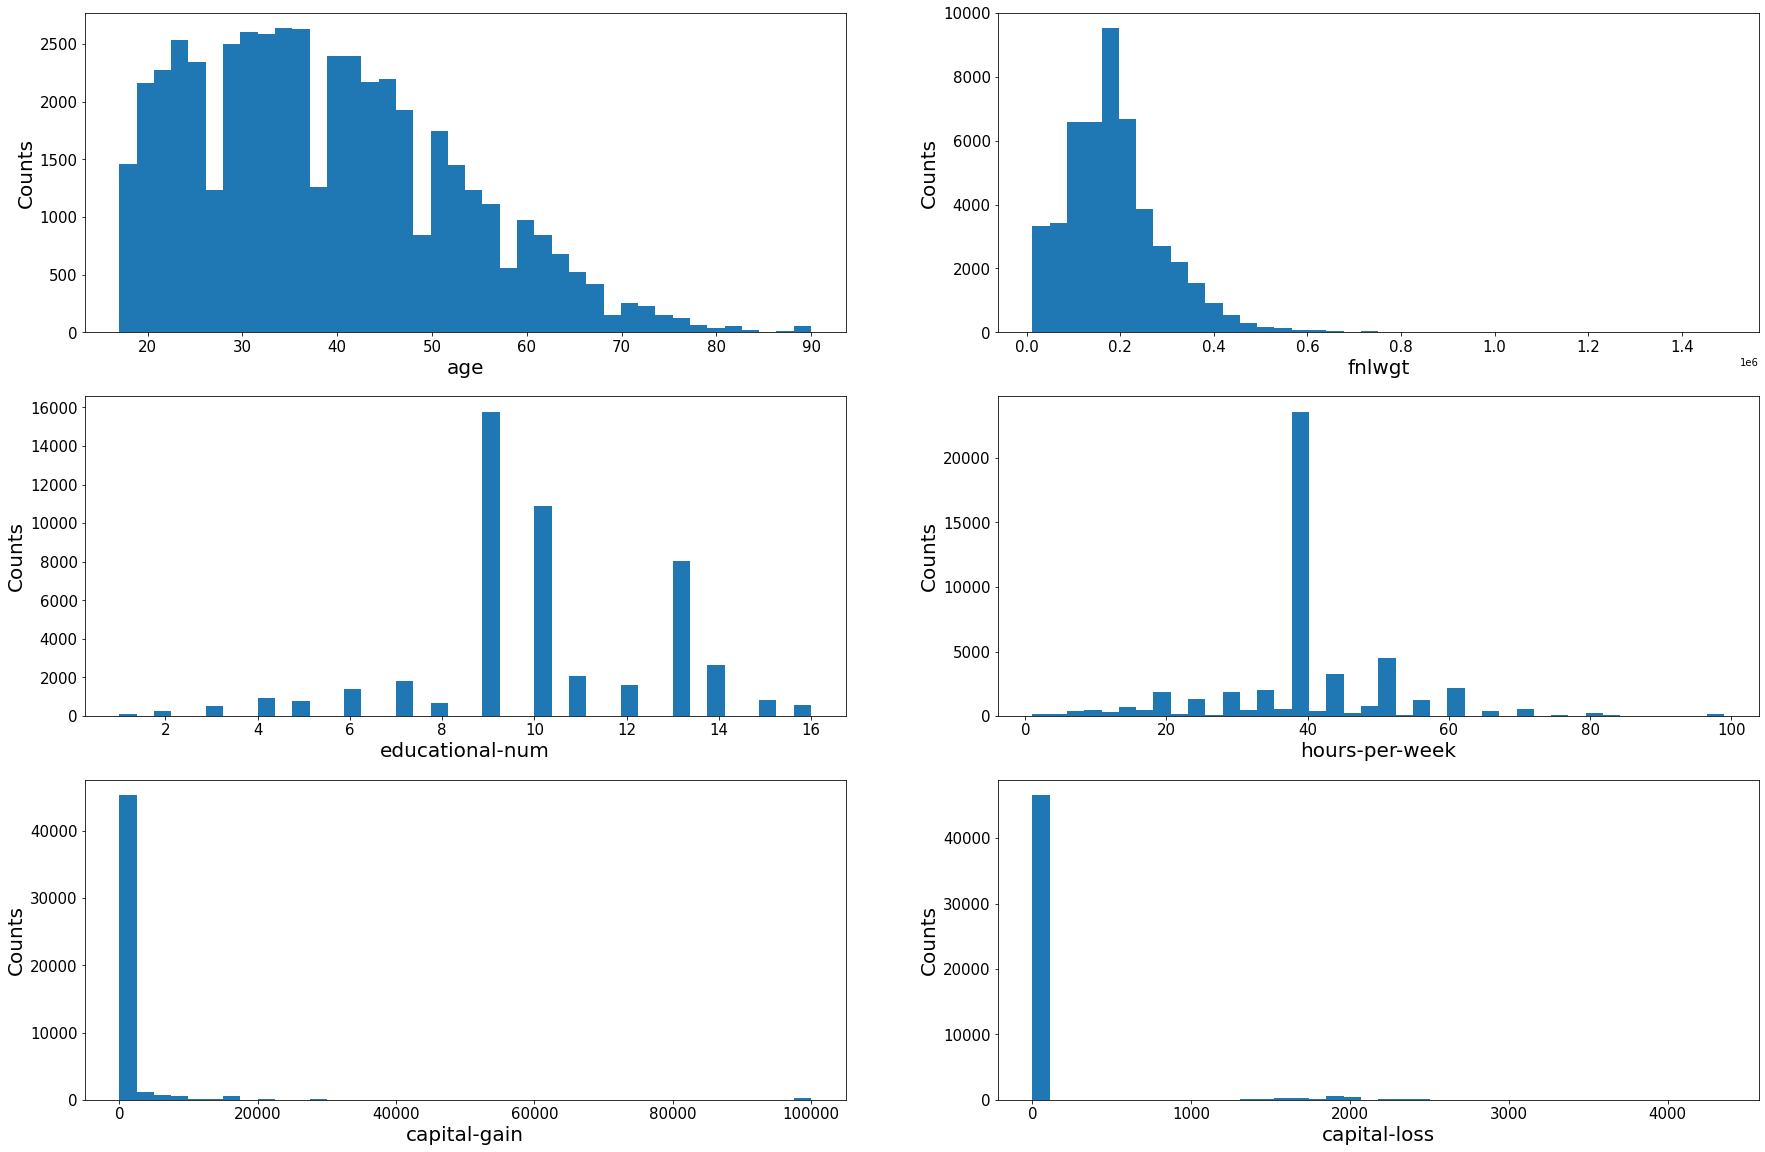

In [21]:
## Make some histograms of your data
## Specify the features of interest
features = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital-gain','capital-loss']
xaxes = features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']
# set up the figure size
plt.rcParams['figure.figsize'] = (30, 20)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(income_df[features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

#### Observation:

1. <b>Age</b>: From the histogram, we observe that age feature is rightly skewed, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases. There is no null values present in this column
2. <b>fntwgt</b>:The fntwgt feature is also rightly skewed with majority of data lies between 100k and 200k. The count decrease as the value increases.
3. <b>education_num</b>: The histogram for education number feature shows the type as multimode distribution. The frequency of education numberis high at 9 and least at 2.
4. <b>hours-per-week</b>: The hours per week column has values scattered over a range of 1–99. The column does not have any missing values. Majority of the values have data near 40 hours and hence a high peak can be observed for the same.
5. <b>capital-gain and capital-loss</b>: Capital_gain and Capital-loss columns are numeric columns, with majority of the values set as 0. The distribution plot for Capital_gain and Capital_loss columns are highly right skewed.


##### Heat Map

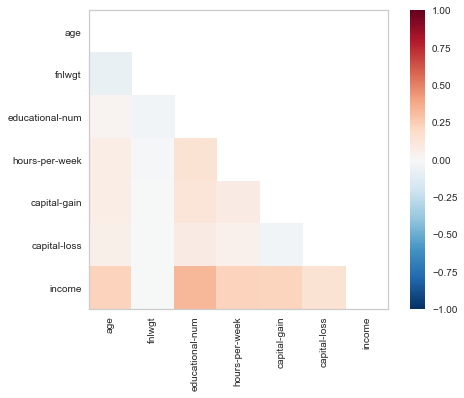

In [22]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital-gain','capital-loss','income']

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = income_df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show() 

##### Observation

1. Age, education-num, hours-per-week, capital-gain and capital-loss are positively correlated with income
2. Fnlwgt is the only numerical values which is negatively correlated with income.

##### Bar Graph

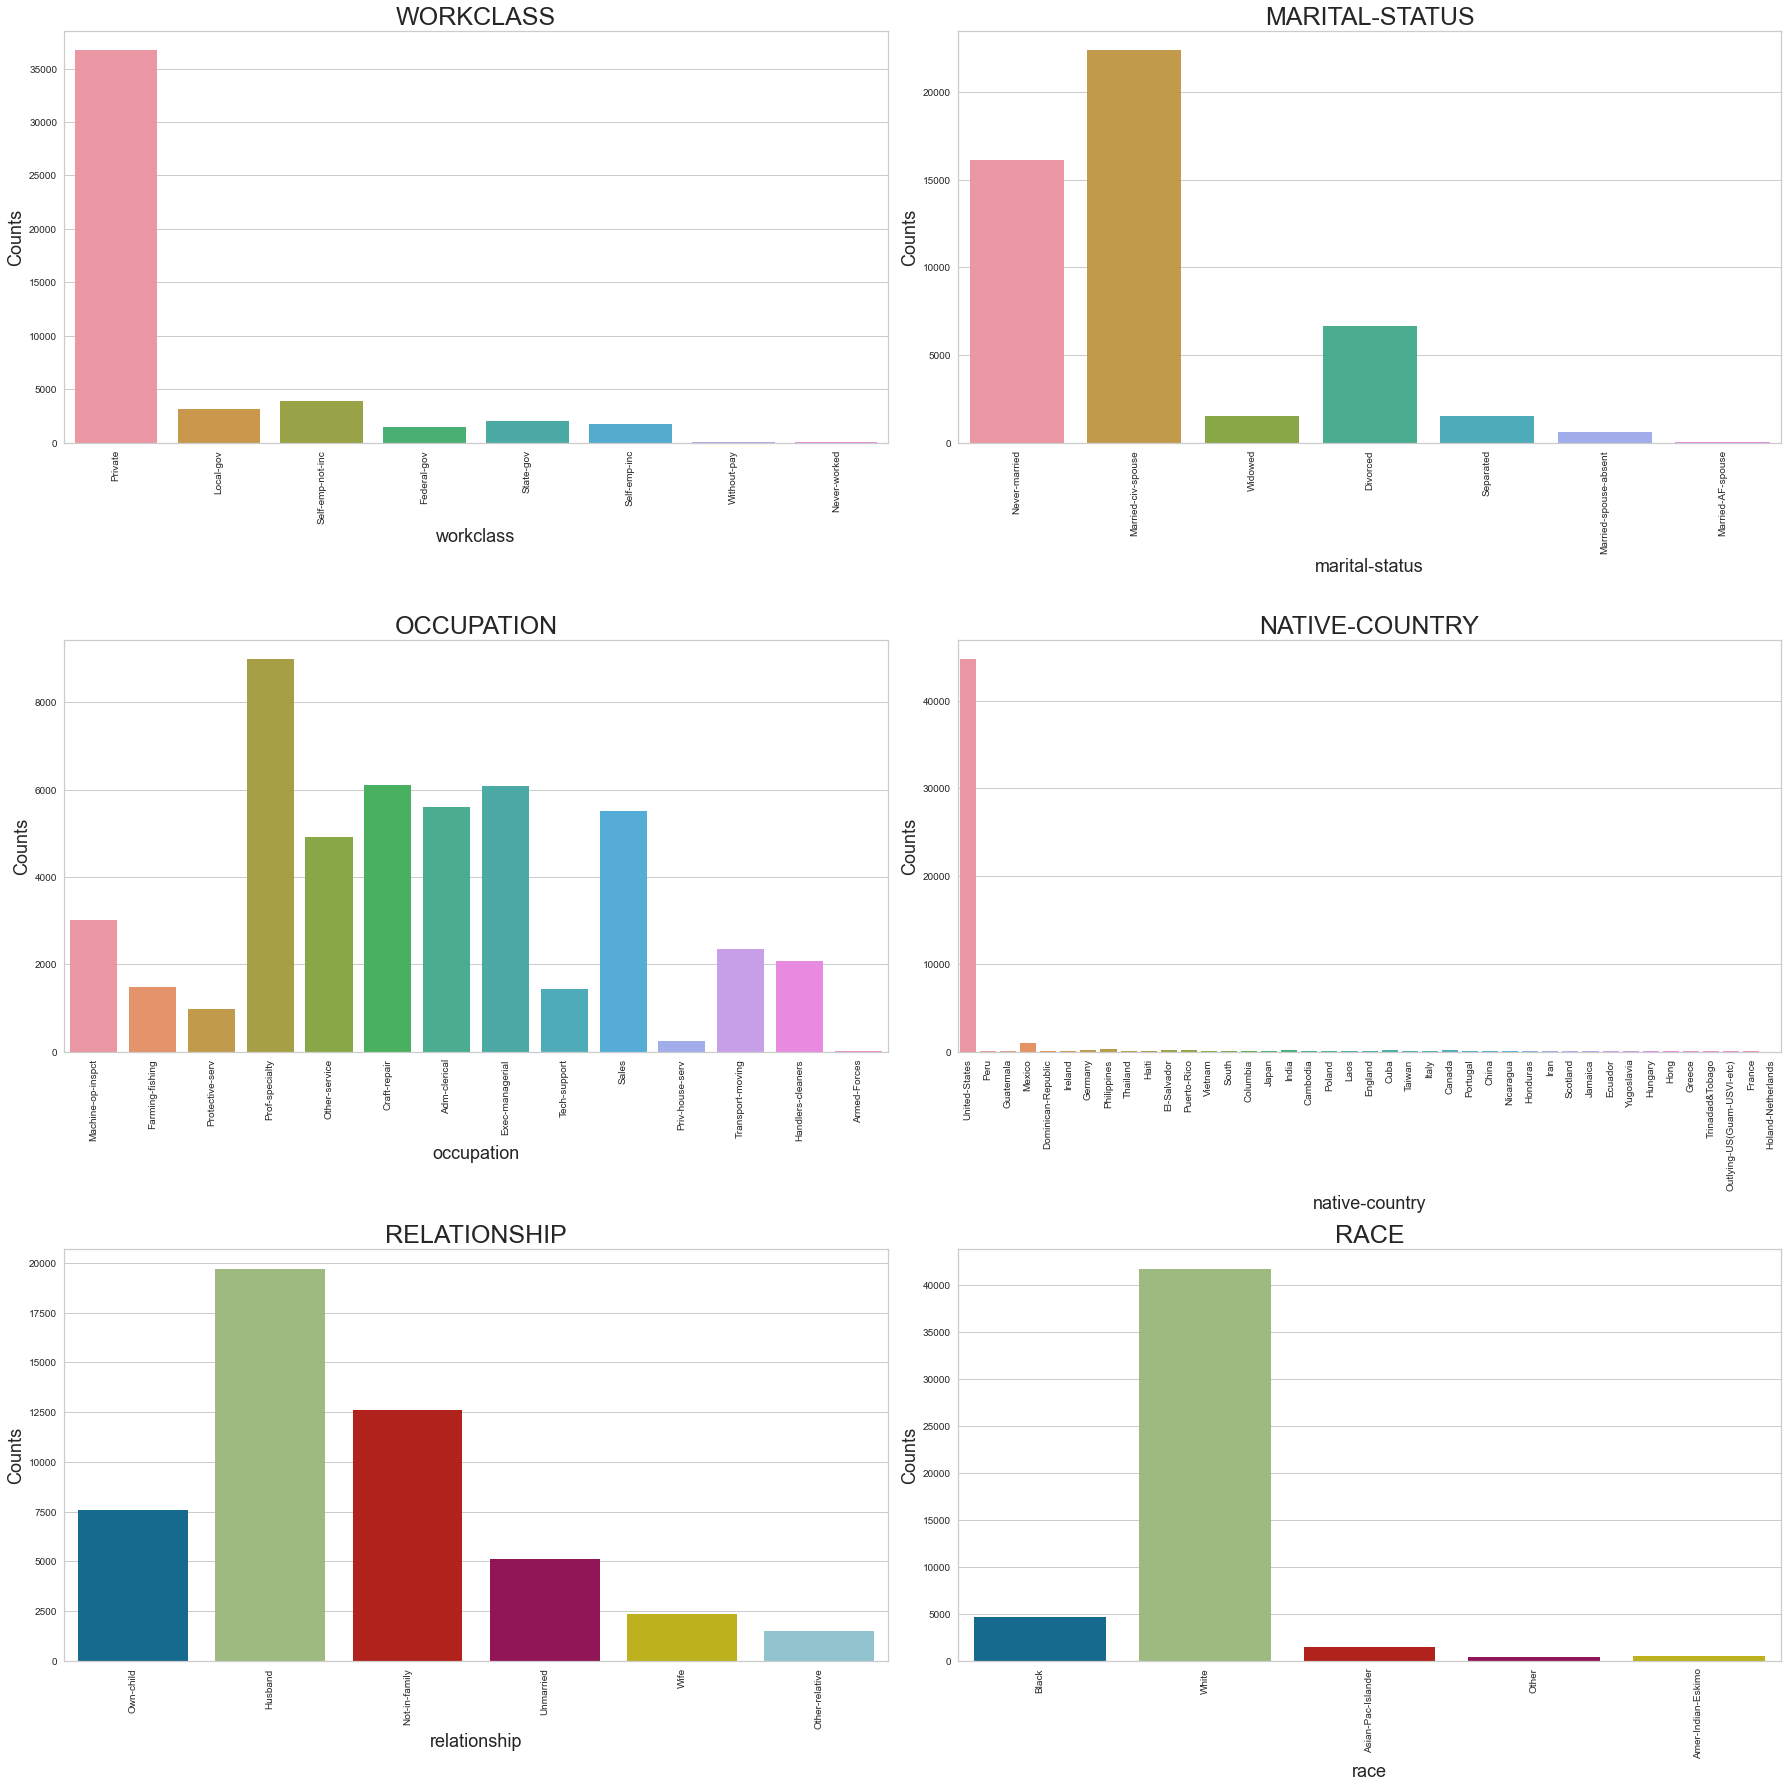

In [23]:
features = ['workclass','marital-status','occupation','native-country','relationship','race']
fig = plt.figure()

for i, col in enumerate(features):
    fig.add_subplot(3,2, i + 1)
    fig.set_figheight(25)
    fig.set_figwidth(25)
    title = col.upper()
    p = sns.countplot(income_df[col])
    p.set_title(title, fontsize = 25)
    p.set_ylabel('Counts', fontsize = 18)
    p.set_xlabel(col, fontsize = 18)
    plot = plt.xticks(rotation = 90)
fig.tight_layout()

#### Observation:

1. <b>workclass</b>: There are 7 unique values present for this feature. We had around 2799 null values present in this column which contributes only 5% of total records. So, all these null values are replaced with mode from the column. Majority of the people belong to ‘Private’ sector workclass. The values where ‘Workclass’ is missing, also has ‘Occupation’ missing!
2. <b>marital-status</b>: The ‘Marital_Status’ column has 7 different categories available, and has no missing values. Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’. Count of ‘Never-married’ is also quite high
3. <b>occupation</b>: The occupation column contains 14 different categories, and have missing values (which we have already observed, and combined with ‘Workclass’ column). The null values are replaced with null values.
4. <b>native-country</b>: The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers. We also have 857 missing values in this column, which are replaced with mode.
5. <b>relationship</b>: The relationship column contains 6 different types of values, with highest number set for ‘Husband’ and lowest for ‘Other-relative’. The column does not have any missing value.
6. <b>race</b>: The Race column has 5 different categories, and no missing data. Highest number of people have race as ‘White’ (significantly high numbers).

#### Bar  Chart with Income

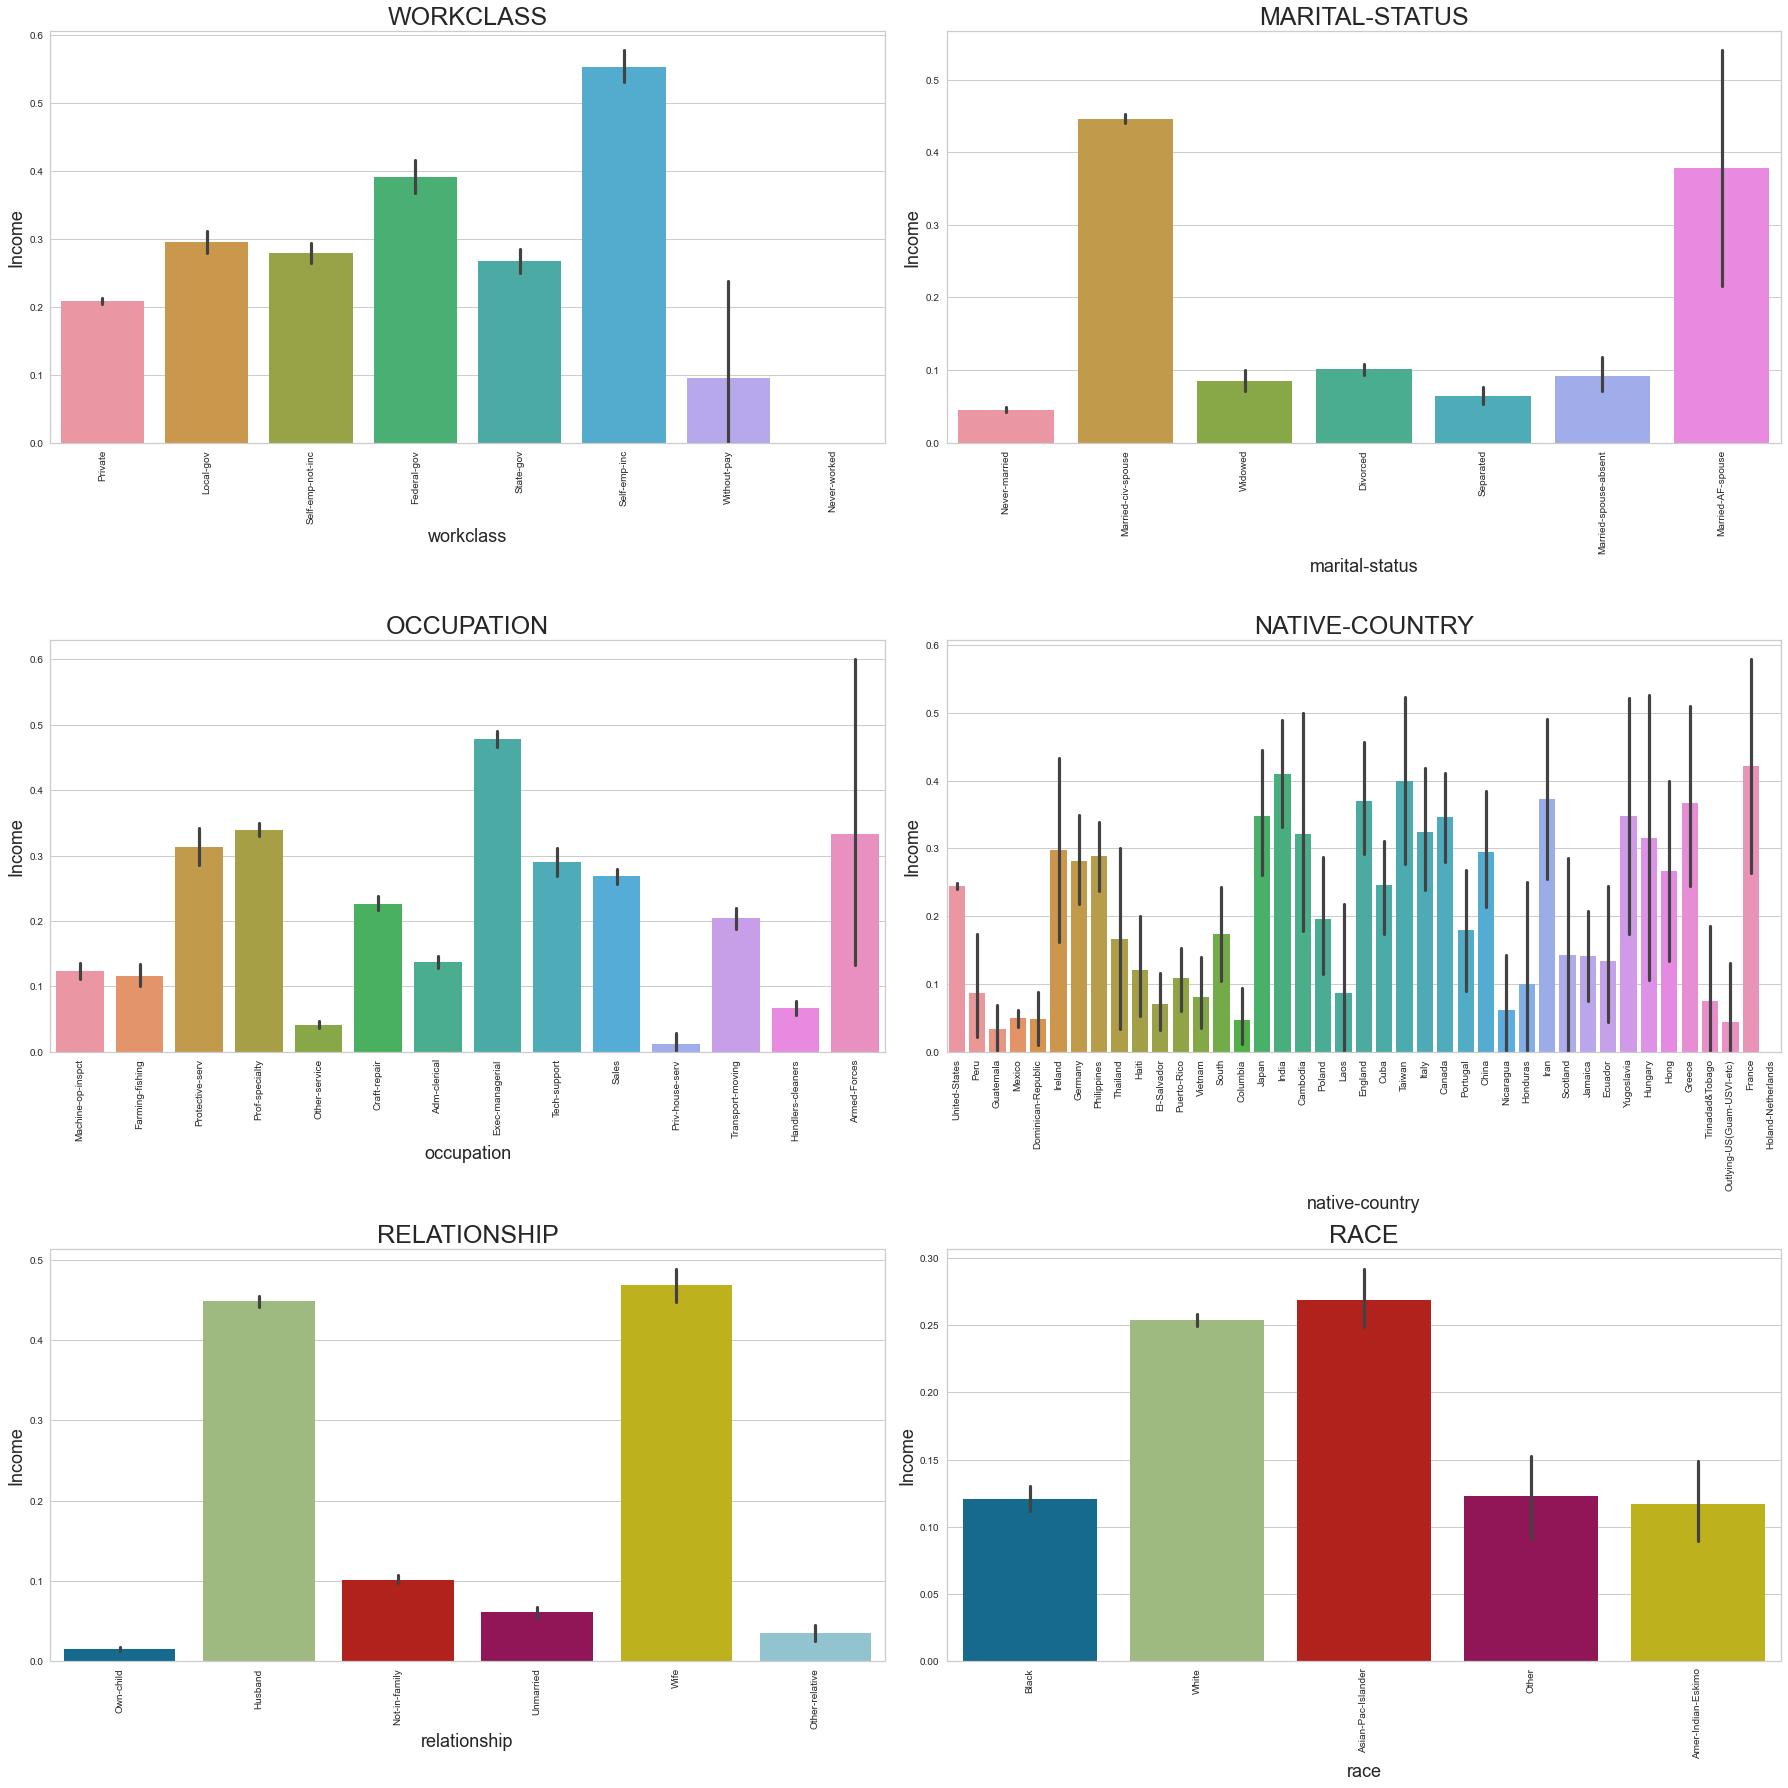

In [24]:
features = ['workclass','marital-status','occupation','native-country','relationship','race']

fig = plt.figure()

for i, col in enumerate(features):
    fig.add_subplot(3,2, i + 1)
    fig.set_figheight(25)
    fig.set_figwidth(25)
    title = col.upper()
    p = sns.barplot(x=col,y="income",data=income_df)
    p.set_title(title, fontsize = 25)
    p.set_ylabel('Income', fontsize = 18)
    p.set_xlabel(col, fontsize = 18)
    plot = plt.xticks(rotation = 90)
fig.tight_layout()

##### Stacked Bar

<Figure size 576x396 with 0 Axes>

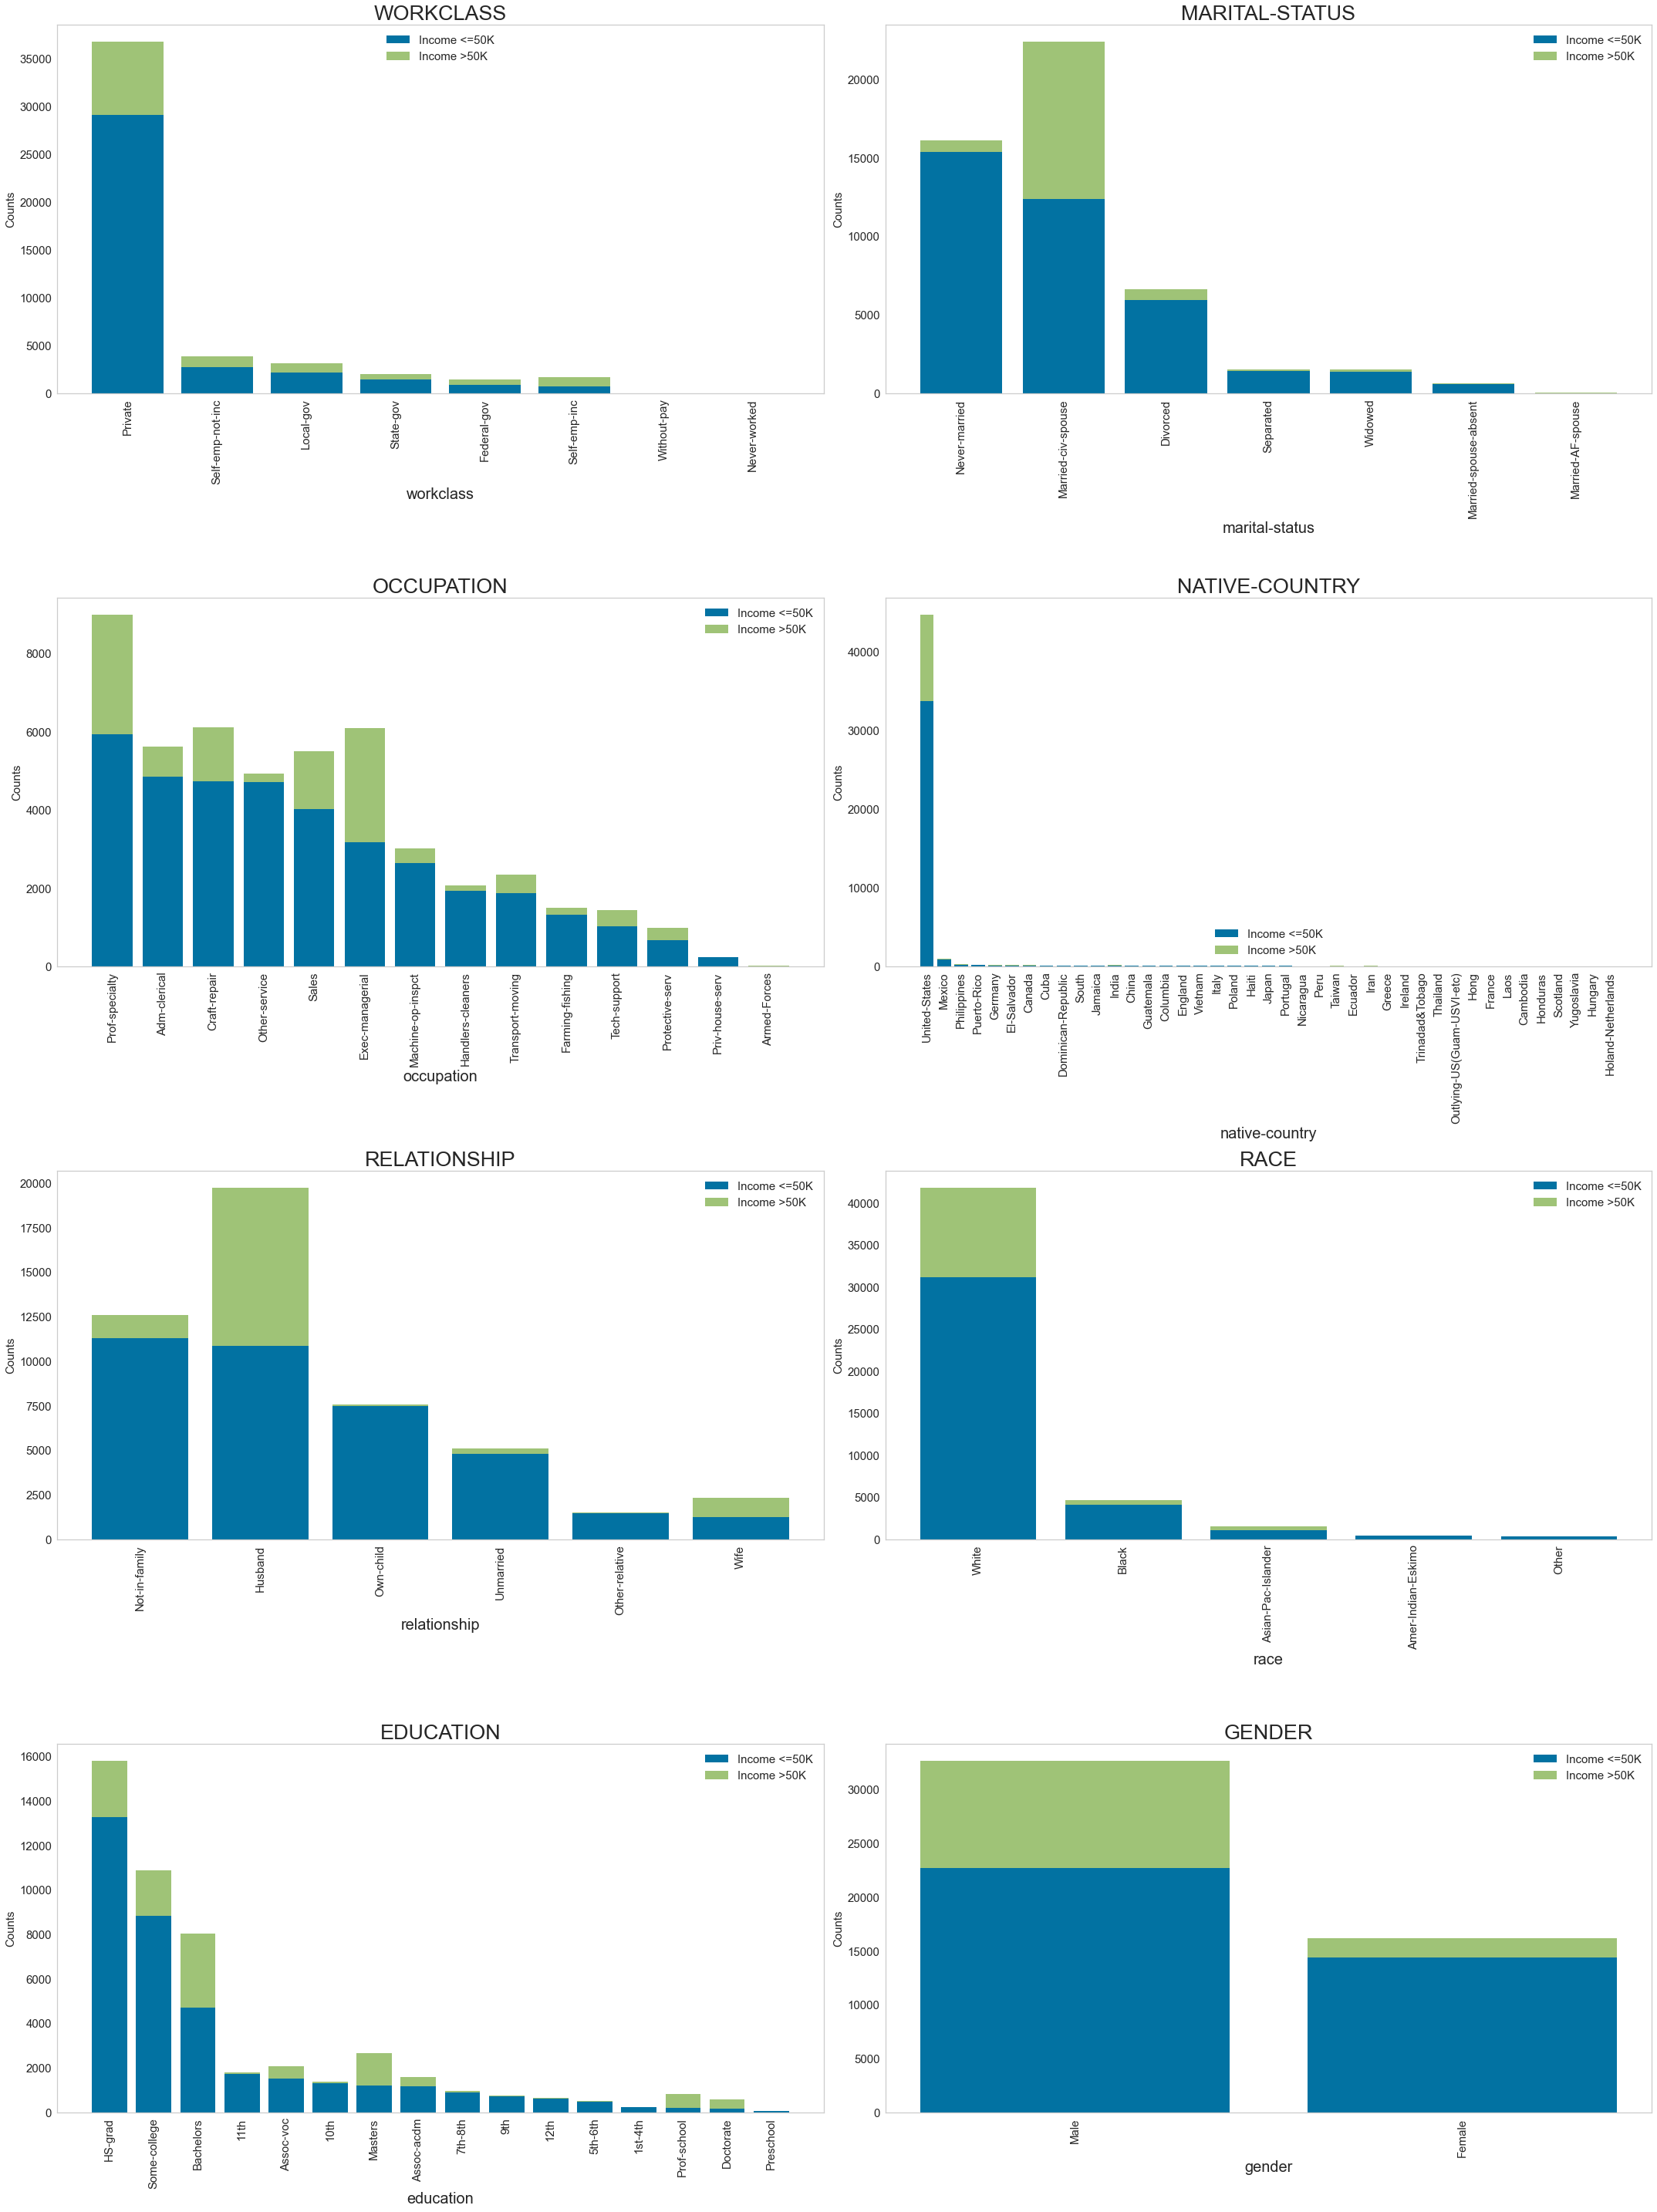

In [25]:
# make the data read to feed into the visualizer
cat_features = ['workclass','marital-status','occupation','native-country','relationship','race', 'education','gender']
fig = plt.figure()

plt.rcParams['figure.figsize'] = (30, 40)

# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)
colindex = 0

for idx, ax in enumerate(axes):
    
    for j in range(2):
        
        
        col = cat_features[colindex]
        coltitle = col.upper()
        
        income_less_50 = income_df[income_df['income']==0][col].value_counts()
        income_grt_50 = income_df[income_df['income']==1][col].value_counts()
        income_grt_50 = income_grt_50.reindex(index = income_less_50.index)
        
        axes[idx,j].grid(False)
        p1 = axes[idx,j].bar(income_less_50.index, income_less_50.values)
        p2 = axes[idx,j].bar(income_grt_50.index, income_grt_50.values, bottom=income_less_50.values)
        
        axes[idx,j].set_title(coltitle, fontsize=27)
        axes[idx,j].set_xlabel(col, fontsize=20)
        axes[idx,j].set_ylabel('Counts', fontsize=15)
        axes[idx,j].tick_params(axis='both', labelsize=15)
        axes[idx,j].tick_params(axis='x', labelrotation=90)
        axes[idx,j].legend((p1[0],p2[0]),('Income <=50K', 'Income >50K'), fontsize=15)
        colindex += 1
fig.tight_layout()

#### Observation:

1. <b>workclass</b>: Majority of the people belong to ‘Private’ sector workclass. Among Privte class most of the people belong to <=50K incme group. Most of the people belong to <=50K compared to >50K for all other income group as well.
2. <b>marital-status</b>: The ‘Marital_Status’ column has 7 different categories available, and has no missing values. Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’. Count of ‘Never-married’ is also quite high. The data is almost equally split between the income group for "Married-civ-spouse' 
3. <b>occupation</b>: The occupation column contains 14 different categories, and have missing values (which we have already observed, and combined with ‘Workclass’ column). Except few values where the data is equally split between the income class, all other group have higher count for <=50K income.
4. <b>native-country</b>: The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers. We also have 857 missing values in this column, which are removed from the datasets. The count is higher for <=50K income group compared to other for US.
5. <b>relationship</b>: The relationship column contains 6 different types of values, with highest number set for ‘Husband’ and lowest for ‘Other-relative’. The column does not have any missing value. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.
6. <b>race</b>: The Race column has 5 different categories, and no missing data. Highest number of people have race as ‘White’ (significantly high numbers). A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.
7. <b>education</b>: People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has around 10:7 ratio of <=50K : >50K.
8. <b>gender</b>: Males have a higher chance of earning more than 50K, than females.

#### Label Encoder

In [26]:
## Importing the LabelEncoder library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
## Printing the info
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


In [28]:
## Converting categorical variables into numerical using label encoder
for col in income_df.columns:
    if income_df[col].dtypes == 'object':
        income_df[col] = le.fit_transform(income_df[col])

In [29]:
## Printing few records from the dataframe using head
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


In [30]:
## Priting the info of the dataframe
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int32
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int32
 6   occupation       48842 non-null  int32
 7   relationship     48842 non-null  int32
 8   race             48842 non-null  int32
 9   gender           48842 non-null  int32
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int32
 14  income           48842 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB


<AxesSubplot:>

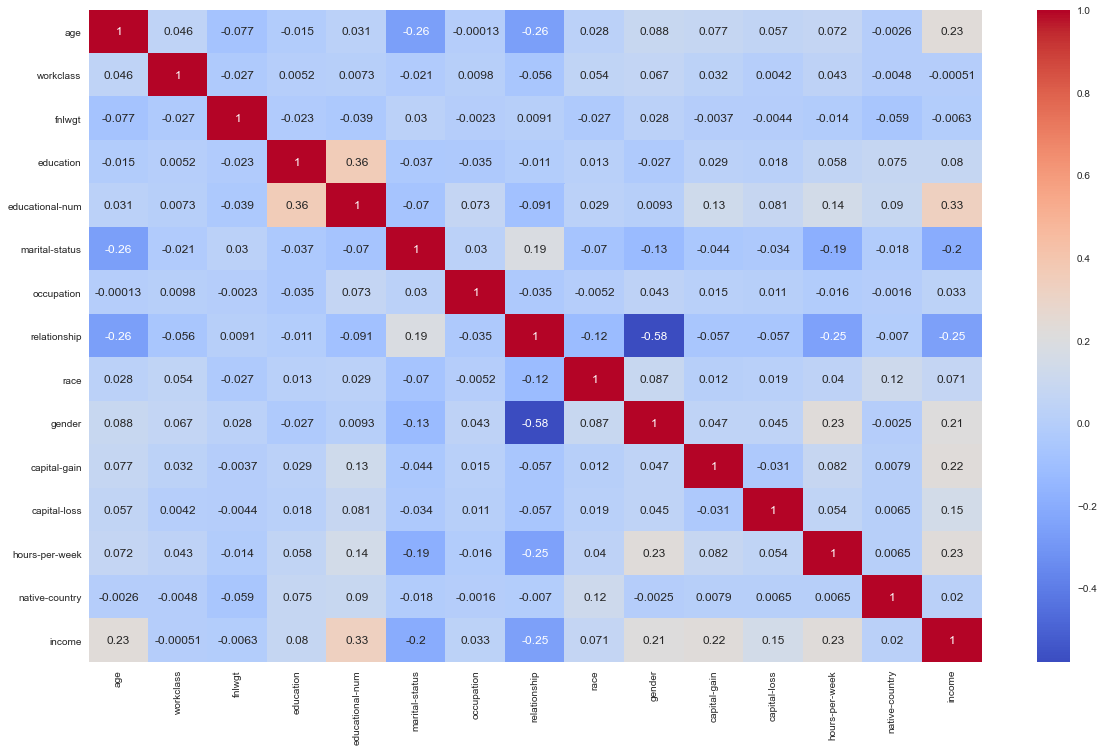

In [31]:
## Correlation matrix
corrmat = income_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [32]:
## Printing the Correlation for income field 
corrmat['income'].sort_values(ascending = False)

income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
gender             0.214628
capital-loss       0.147554
education          0.080091
race               0.070934
occupation         0.032550
native-country     0.020375
workclass         -0.000511
fnlwgt            -0.006339
marital-status    -0.199072
relationship      -0.253214
Name: income, dtype: float64

<AxesSubplot:>

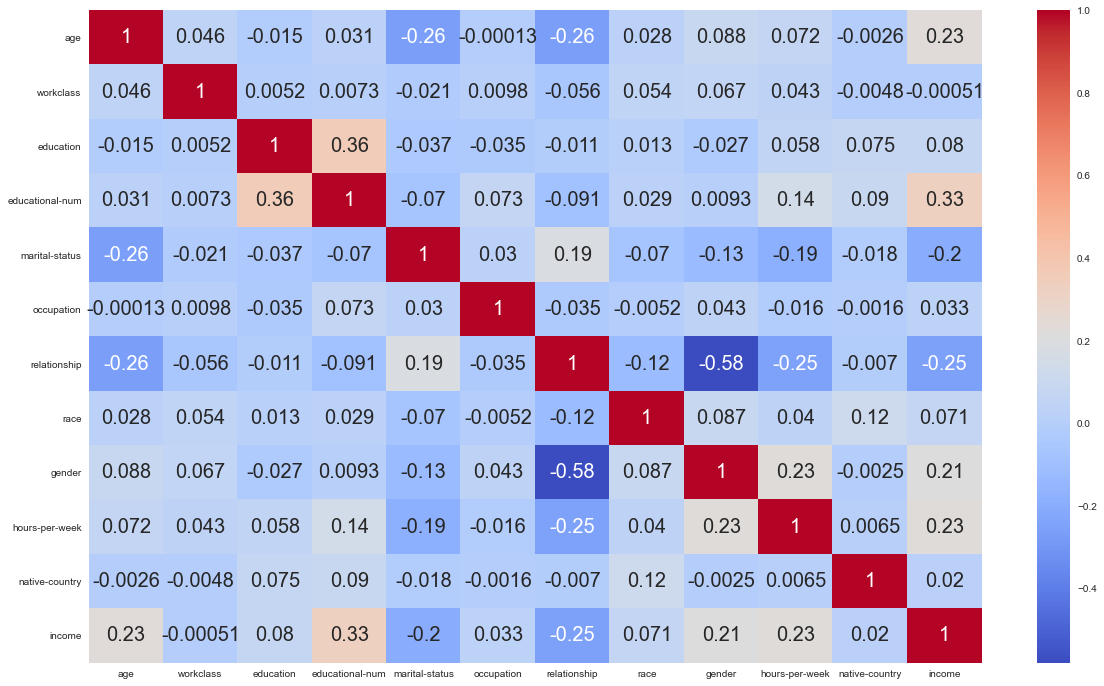

In [281]:
## Correlation matrix after removing irrelevant features
income_df_un = income_df.copy(deep=True)
income_df_un = income_df_un.drop(['capital-gain','capital-loss','fnlwgt'],axis=1)
corrmat = income_df_un.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [282]:
## Printing the Correlation for income field 
corrmat['income'].sort_values(ascending = False)

income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
gender             0.214628
education          0.080091
race               0.070934
occupation         0.032550
native-country     0.020375
workclass         -0.000511
marital-status    -0.199072
relationship      -0.253214
Name: income, dtype: float64

## Modeling

In [224]:
## Importing lib required for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport

#### Logistic Regression

##### Running Logistic Regression on the dataset with all the features

In [151]:
## DEclare a list variable to store all the results
model_result = {}

In [152]:
## Declaring the source and target for the modeling
X = income_df.iloc[:,0:-1]
y = income_df.iloc[:,-1]

In [153]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [154]:
## Priting values from X_Train dataframe
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
42392,25,3,188767,11,9,4,2,3,4,1,0,0,40,38
14623,64,3,286732,11,9,6,11,1,4,0,0,0,17,38
27411,29,3,253801,11,9,2,2,0,4,1,0,0,40,6
1288,28,3,334032,8,11,2,2,0,4,1,0,0,50,38
7078,22,3,173004,11,9,4,6,2,2,1,0,0,1,38


##### Without StandardScalar

##### Logistic Regression

In [155]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, model.predict(X_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['LR_WO_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 78.6217789347451
Logistic Regression score for test data: 79.80618303419095
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11233
           1       0.65      0.29      0.40      3420

    accuracy                           0.80     14653
   macro avg       0.73      0.62      0.64     14653
weighted avg       0.78      0.80      0.77     14653

Confusion Matrix
[[10706   527]
 [ 2432   988]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981'}


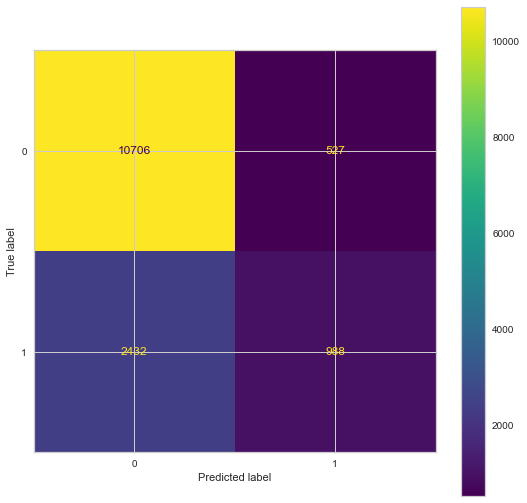

In [156]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(model, X_test, y_test, ax=ax)  

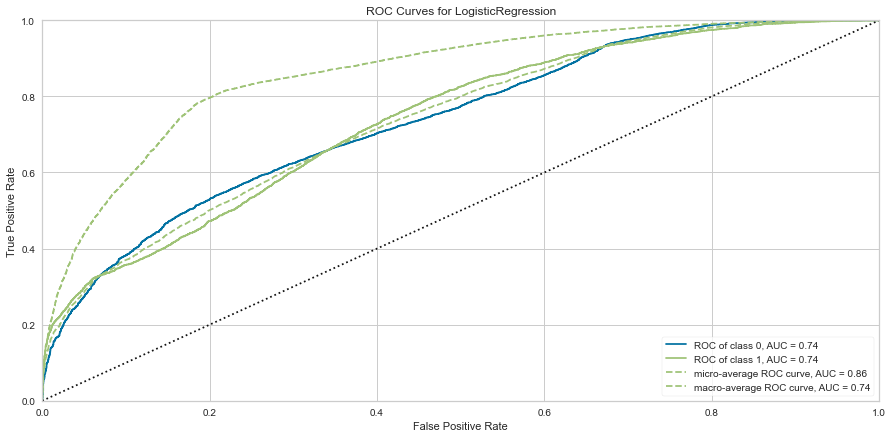

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [161]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(model, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

##### Decision Tree

In [162]:
## Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['DT_WO_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 99.99122524788675
Logistic Regression score for test data: 82.14017607315908
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11233
           1       0.61      0.64      0.62      3420

    accuracy                           0.82     14653
   macro avg       0.75      0.76      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Confusion Matrix
[[9859 1374]
 [1243 2177]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214'}


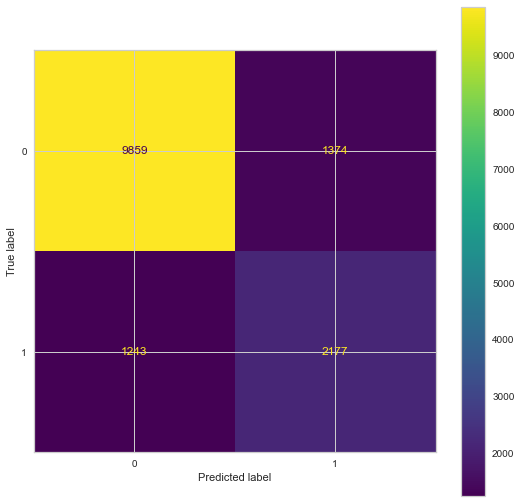

In [163]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax)  

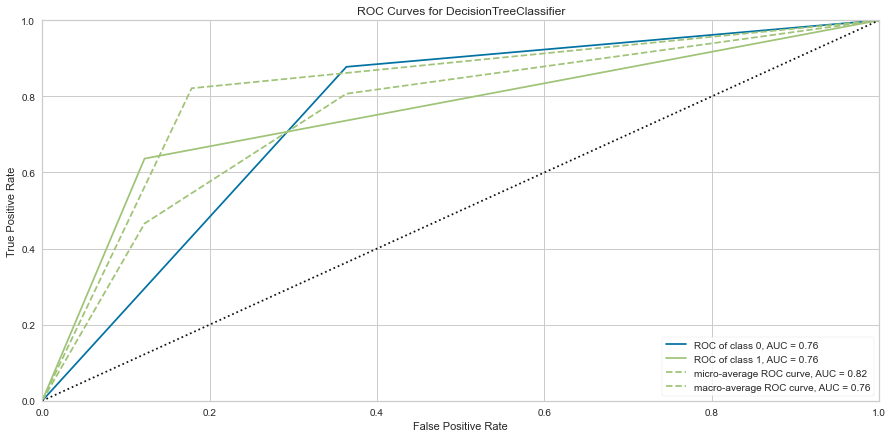

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [164]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

###### Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print("Confusion Matrix")
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['RF_WO_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 99.99122524788675
Logistic Regression score for test data: 86.5556541322596
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11233
           1       0.74      0.65      0.69      3420

    accuracy                           0.87     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.87      0.86     14653

Confusion Matrix
[[10471   762]
 [ 1208  2212]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656'}


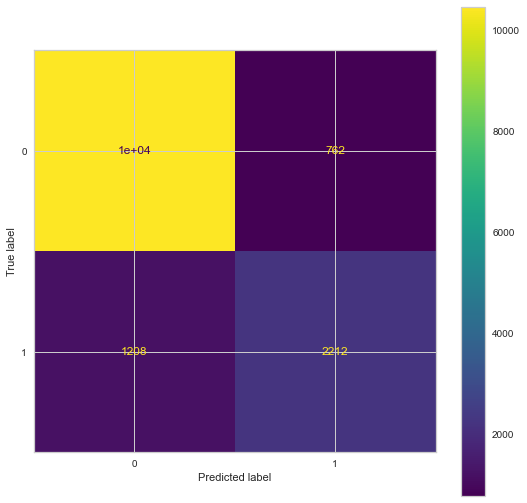

In [166]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax)  

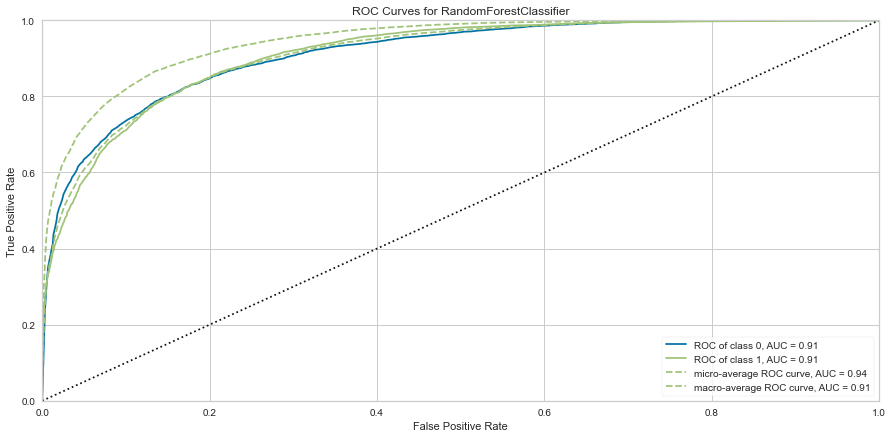

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [167]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

#### With StandardScalar

In [174]:
## Apply standard Scalar to the dataset
sc = StandardScaler()
X_ss_train = pd.DataFrame(sc.fit_transform(X_train))
X_ss_test = pd.DataFrame(sc.transform(X_test))

In [175]:
## Printing few records from X Train dataset
X_ss_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.996239,-0.089013,-0.007525,0.180902,-0.420199,0.921385,-1.048237,0.977602,0.389616,0.704533,-0.14428,-0.220066,-0.035059,0.260219
1,1.841844,-0.089013,0.920502,0.180902,-0.420199,2.250073,1.222749,-0.271118,0.389616,-1.419379,-0.14428,-0.220066,-1.883173,0.260219
2,-0.705153,-0.089013,0.608545,0.180902,-0.420199,-0.407304,-1.048237,-0.895478,0.389616,0.704533,-0.14428,-0.220066,-0.035059,-5.043788
3,-0.777925,-0.089013,1.368578,-0.593238,0.357297,-0.407304,-1.048237,-0.895478,0.389616,0.704533,-0.14428,-0.220066,0.768469,0.260219
4,-1.214553,-0.089013,-0.156849,0.180902,-0.420199,0.921385,-0.038910,0.353242,-1.976176,0.704533,-0.14428,-0.220066,-3.168817,0.260219


###### Logistic Regression

In [176]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_ss_train, y_train)

y_pred = model.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, model.predict(X_ss_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['LR_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 82.35104858287752
Logistic Regression score for test data: 83.01371732750972
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11233
           1       0.71      0.46      0.56      3420

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.82     14653

Confusion Matrix
[[10597   636]
 [ 1853  1567]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301'}


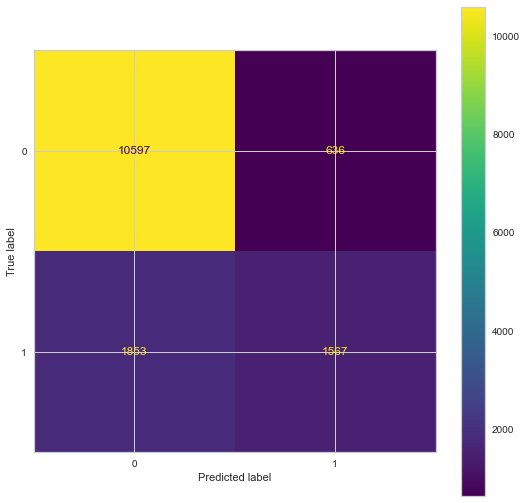

In [177]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(model, X_ss_test, y_test, ax=ax) 

#### Decision Tree

In [178]:
## Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_ss_train, y_train)

y_pred = classifier.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_ss_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['DT_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 99.99122524788675
Logistic Regression score for test data: 82.17429877840715
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11233
           1       0.61      0.64      0.63      3420

    accuracy                           0.82     14653
   macro avg       0.75      0.76      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Confusion Matrix
[[9863 1370]
 [1242 2178]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217'}


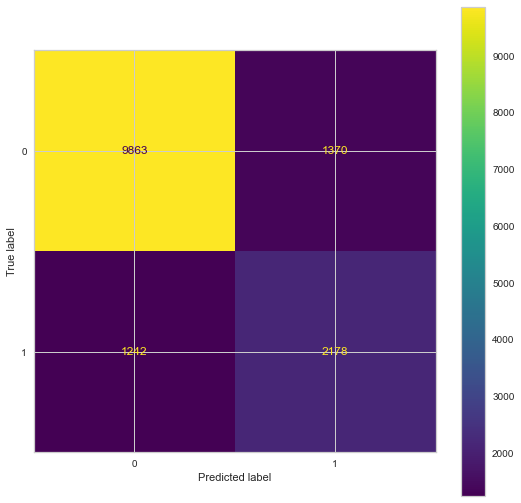

In [179]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(classifier, X_ss_test, y_test, ax=ax)  

##### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_ss_train, y_train)

y_pred = classifier.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_ss_train))
print('Random Forest score for train data:', train_acc * 100)
print('Random Forest score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print("Confusion Matrix")
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['RF_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Random Forest score for train data: 99.99122524788675
Random Forest score for test data: 86.54882959120998
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11233
           1       0.74      0.65      0.69      3420

    accuracy                           0.87     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.87      0.86     14653

Confusion Matrix
[[10470   763]
 [ 1208  2212]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655'}


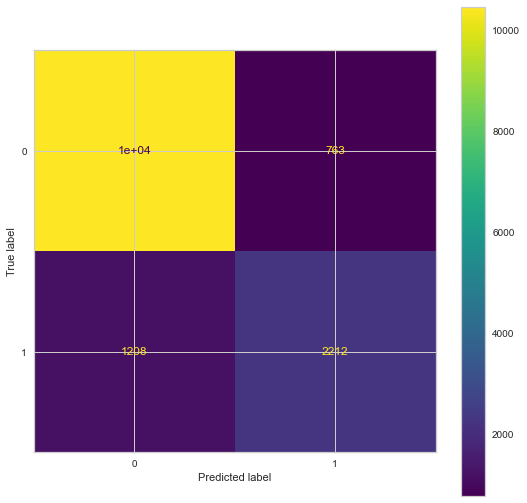

In [181]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(classifier, X_ss_test, y_test, ax=ax)  

##### Running Logistic Regression on the dataset after dropping unwanted features like capital-gain, capital-loss and fnlwgt

In [201]:
## Copy the dataframe into another dataframe
## Drop all the unwanted columns from the dataframe
income_df_2 = income_df.copy(deep=True)
income_df_2 = income_df_2.drop(['capital-gain','capital-loss','fnlwgt'],axis=1)

In [204]:
## Printing few values from the drop dataframe
income_df_2.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,3,1,7,4,6,3,2,1,40,38,0
1,38,3,11,9,2,4,0,4,1,50,38,0
2,28,1,7,12,2,10,0,4,1,40,38,1
3,44,3,15,10,2,6,0,2,1,40,38,1
4,18,3,15,10,4,9,3,4,0,30,38,0


In [205]:
## Declaring the source and target for the modeling
X = income_df_2.iloc[:,0:-1]
y = income_df_2.iloc[:,-1]

In [206]:
## Printing few records from the dataframe
X.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,3,1,7,4,6,3,2,1,40,38
1,38,3,11,9,2,4,0,4,1,50,38
2,28,1,7,12,2,10,0,4,1,40,38
3,44,3,15,10,2,6,0,2,1,40,38
4,18,3,15,10,4,9,3,4,0,30,38


In [207]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

##### Without StandardScalar

##### Logistic Regression

In [187]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, model.predict(X_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['LR_WO_SS_FILTER'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 79.92336716487759
Logistic Regression score for test data: 80.74114515798813
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11233
           1       0.64      0.40      0.49      3420

    accuracy                           0.81     14653
   macro avg       0.74      0.67      0.69     14653
weighted avg       0.79      0.81      0.79     14653

Confusion Matrix
[[10462   771]
 [ 2051  1369]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074'}


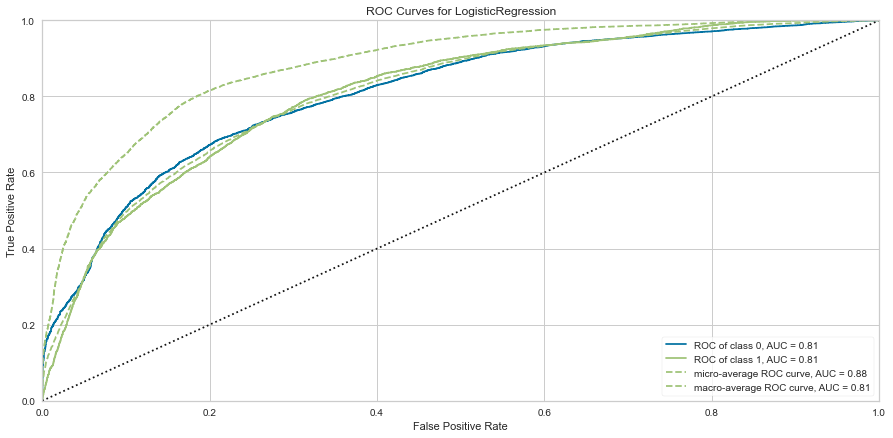

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [188]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(model, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

##### Decision Tree

In [191]:
## Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_train))
print('Decision Tree score for train data:', train_acc * 100)
print('Decision Tree score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['DT_WO_SS_FILTER'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Decision Tree score for train data: 96.5602971716049
Decision Tree score for test data: 78.44809936531767
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     11233
           1       0.54      0.53      0.53      3420

    accuracy                           0.78     14653
   macro avg       0.70      0.69      0.70     14653
weighted avg       0.78      0.78      0.78     14653

Confusion Matrix
[[9693 1540]
 [1618 1802]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845'}


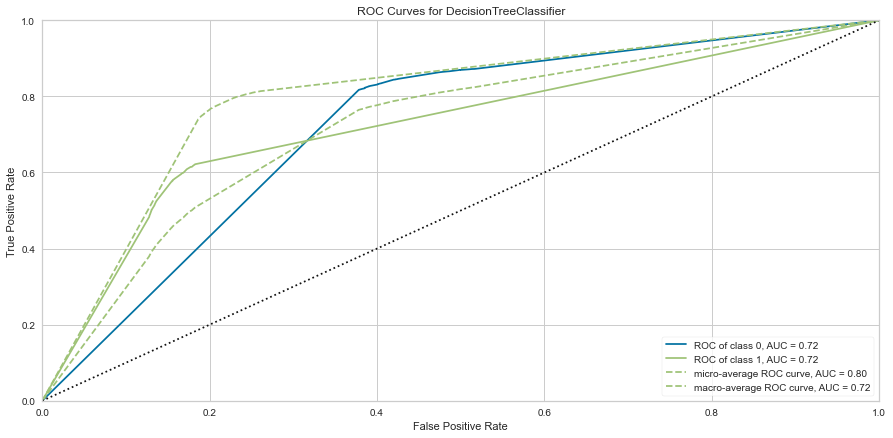

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [192]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

###### Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_train))
print('Random Forest score for train data:', train_acc * 100)
print('Random Forest score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print("Confusion Matrix")
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['RF_WO_SS_FILTER'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Random Forest score for train data: 96.5602971716049
Random Forest score for test data: 82.32443868149866
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11233
           1       0.63      0.57      0.60      3420

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.74     14653
weighted avg       0.82      0.82      0.82     14653

Confusion Matrix
[[10106  1127]
 [ 1463  1957]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232'}


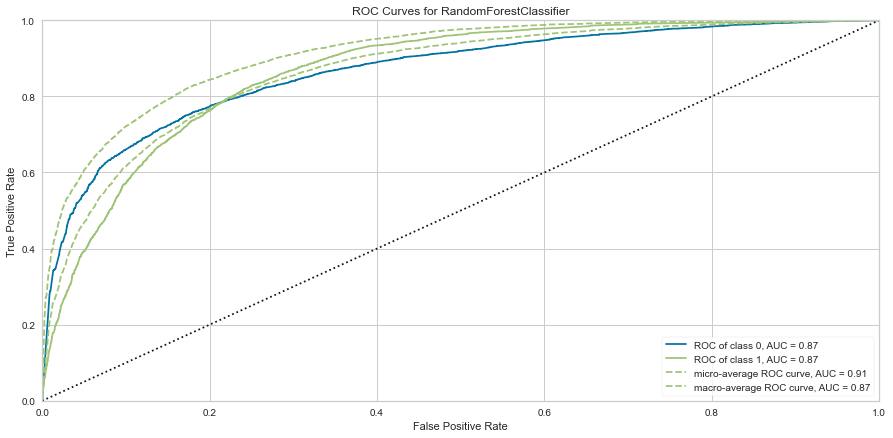

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [194]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

##### With StandardScalar

In [195]:
## Apply standard Scalar to the dataset
X_ss_train = pd.DataFrame(sc.fit_transform(X_train))
X_ss_test = pd.DataFrame(sc.transform(X_test))

In [196]:
X_ss_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.996239,-0.089013,0.180902,-0.420199,0.921385,-1.048237,0.977602,0.389616,0.704533,-0.035059,0.260219
1,1.841844,-0.089013,0.180902,-0.420199,2.250073,1.222749,-0.271118,0.389616,-1.419379,-1.883173,0.260219
2,-0.705153,-0.089013,0.180902,-0.420199,-0.407304,-1.048237,-0.895478,0.389616,0.704533,-0.035059,-5.043788
3,-0.777925,-0.089013,-0.593238,0.357297,-0.407304,-1.048237,-0.895478,0.389616,0.704533,0.768469,0.260219
4,-1.214553,-0.089013,0.180902,-0.420199,0.921385,-0.038910,0.353242,-1.976176,0.704533,-3.168817,0.260219


##### Logistic Regression

In [197]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_ss_train, y_train)

y_pred = model.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, model.predict(X_ss_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['LR_SS_FILTER'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 80.19830939775952
Logistic Regression score for test data: 81.07554766941924
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.88     11233
           1       0.65      0.40      0.50      3420

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.69     14653
weighted avg       0.79      0.81      0.79     14653

Confusion Matrix
[[10508   725]
 [ 2048  1372]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232', 'LR_SS_FILTER': '0.8108'}


#### Decision Tree

In [198]:
## Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_ss_train, y_train)

y_pred = classifier.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_ss_train))
print('Decision Tree score for train data:', train_acc * 100)
print('Decision Tree score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['DT_SS_FILTER'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Decision Tree score for train data: 96.5602971716049
Decision Tree score for test data: 78.44127482426806
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     11233
           1       0.54      0.53      0.53      3420

    accuracy                           0.78     14653
   macro avg       0.70      0.69      0.70     14653
weighted avg       0.78      0.78      0.78     14653

Confusion Matrix
[[9691 1542]
 [1617 1803]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232', 'LR_SS_FILTER': '0.8108', 'DT_SS_FILTER': '0.7844'}


##### Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_ss_train, y_train)

y_pred = classifier.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_ss_train))
print('Random Forest score for train data:', train_acc * 100)
print('Random Forest score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print("Confusion Matrix")
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['RF_SS_FILTER'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Random Forest score for train data: 96.5602971716049
Random Forest score for test data: 82.18794786050638
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11233
           1       0.63      0.57      0.60      3420

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.74     14653
weighted avg       0.82      0.82      0.82     14653

Confusion Matrix
[[10086  1147]
 [ 1463  1957]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232', 'LR_SS_FILTER': '0.8108', 'DT_SS_FILTER': '0.7844', 'RF_SS_FILTER': '0.8219'}


##### Modeling Results

In [200]:
## Printing the modeling results
mapping = {'LR_WO_SS':'Logistic Regression without Standard Scalar',
          'DT_WO_SS':'Decision Tree without Standard Scalar',
          'RF_WO_SS':'Random Forest without Standard Scalar',
          'LR_SS': 'Logistic Regression with Standard Scalar',
          'DT_SS':'Decision Tree Standard Scalar',
          'RF_SS':'Random Forest Standard Scalar',
          'LR_WO_SS_FILTER':'Logistic Regression without Standard Scalar after removing Unwanted Features',
          'DT_WO_SS_FILTER':'Decision Tree without Standard Scalar after removing Unwanted Features',
          'RF_WO_SS_FILTER':'Random Forest without Standard Scalar after removing Unwanted Features',
          'LR_SS_FILTER': 'Logistic Regression with Standard Scalar after removing Unwanted Features',
          'DT_SS_FILTER':'Decision Tree Standard Scalar after removing Unwanted Features',
          'RF_SS_FILTER':'Random Forest Standard Scalar after removing Unwanted Features'
          }
for k, v in model_result.items():
    print("The score for {}: {}".format(mapping[k],v))
    

The score for Logistic Regression without Standard Scalar: 0.7981
The score for Decision Tree without Standard Scalar: 0.8214
The score for Random Forest without Standard Scalar: 0.8656
The score for Logistic Regression with Standard Scalar: 0.8301
The score for Decision Tree Standard Scalar: 0.8217
The score for Random Forest Standard Scalar: 0.8655
The score for Logistic Regression without Standard Scalar after removing Unwanted Features: 0.8074
The score for Decision Tree without Standard Scalar after removing Unwanted Features: 0.7845
The score for Random Forest without Standard Scalar after removing Unwanted Features: 0.8232
The score for Logistic Regression with Standard Scalar after removing Unwanted Features: 0.8108
The score for Decision Tree Standard Scalar after removing Unwanted Features: 0.7844
The score for Random Forest Standard Scalar after removing Unwanted Features: 0.8219


[0.7981, 0.8214, 0.8656, 0.8301, 0.8217, 0.8655, 0.8074, 0.7845, 0.8232, 0.8108, 0.7844, 0.8219, 0.7981, 0.7981, 0.8101]
['LR_WO_SS', 'DT_WO_SS', 'RF_WO_SS', 'LR_SS', 'DT_SS', 'RF_SS', 'LR_WO_SS_FILTER', 'DT_WO_SS_FILTER', 'RF_WO_SS_FILTER', 'LR_SS_FILTER', 'DT_SS_FILTER', 'RF_SS_FILTER', 'LR_TOP5', 'DT_TOP5', 'RF_TOP5']


Text(0.5, 0, 'Accuracy')

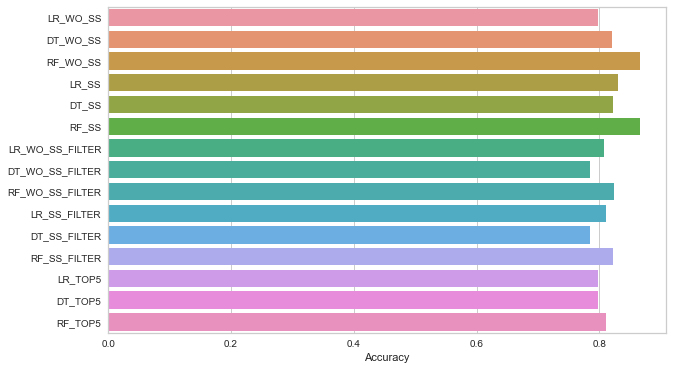

In [263]:
## Plotting the scores
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = []
y_axis = []
for k, v in model_result.items():
    x_axis.append(float(v))
    y_axis.append(k)
print(x_axis)
print(y_axis)
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')

#### Use X2 to find the 5 best features in the dataset and run the Logistic Regression Model and Decision Tree Classifier again

In [264]:
## Copy the dataframe into another dataframe
## Drop all the unwanted columns from the dataframe
income_df_3 = income_df.copy(deep=True)
income_df_3 = income_df_3.drop(['capital-gain','capital-loss','fnlwgt'],axis=1)

In [265]:
## Declaring the source and target for the modeling
X = income_df_3.iloc[:,0:-1]
y = income_df_3.iloc[:,-1]

In [266]:
## Printing few records from the dataframe
X.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,3,1,7,4,6,3,2,1,40,38
1,38,3,11,9,2,4,0,4,1,50,38
2,28,1,7,12,2,10,0,4,1,40,38
3,44,3,15,10,2,6,0,2,1,40,38
4,18,3,15,10,4,9,3,4,0,30,38


In [267]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [268]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [269]:
# Create target and feature_names list
features = X_train
target = y_train

In [270]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [271]:
# Show results
print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 11
Reduced number of features: 5


In [272]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
features_df_new

,age,educational-num,marital-status,relationship,hours-per-week
42392,25,9,4,3,40
14623,64,9,6,1,17
27411,29,9,2,0,40
1288,28,11,2,0,50
7078,22,9,4,2,1
...,...,...,...,...,...
11284,36,9,3,1,40
44732,34,10,2,0,50
38158,28,10,0,1,40
860,46,11,5,4,40


In [273]:
##split the data into a training and test set with top 5 features
X_chi = income_df_3[['age', 'educational-num', 'marital-status', 'relationship', 'hours-per-week']]
#get the target
y_chi = income_df_3['income']

In [274]:
#split the data into training and test sets (80% Training/20% Test)
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size = 0.3)

In [275]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_chi = X_train_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_chi = X_test_chi.reset_index(drop = True)
y_train_chi = y_train_chi.reset_index(drop = True)
y_test_chi = y_test_chi.reset_index(drop = True)

#### Logistic Regression

In [276]:
## Logistic Regression
model = LogisticRegression(max_iter = 500)
model.fit(X_train_chi, y_train_chi)

y_pred_chi = model.predict(X_test_chi)
acc_chi = accuracy_score(y_test_chi, y_pred_chi)
train_acc_chi = accuracy_score(y_train_chi, model.predict(X_train_chi))
print('Logistic Regression score for train data:', train_acc_chi * 100)
print('Logistic Regression score for test data:', acc_chi * 100)
print('Classification Report')
print(cr(y_test_chi, y_pred_chi))
print('Confusion Matrix')
print(cm(y_test_chi, y_pred_chi))
model_result['LR_TOP5'] = "{:.4f}".format(acc_chi)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 80.34455526631372
Logistic Regression score for test data: 79.99044564253055
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.88     11079
           1       0.65      0.38      0.48      3574

    accuracy                           0.80     14653
   macro avg       0.74      0.66      0.68     14653
weighted avg       0.78      0.80      0.78     14653

Confusion Matrix
[[10354   725]
 [ 2207  1367]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232', 'LR_SS_FILTER': '0.8108', 'DT_SS_FILTER': '0.7844', 'RF_SS_FILTER': '0.8219', 'LR_TOP5': '0.7999', 'DT_TOP5': '0.7981', 'RF_TOP5': '0.8101'}


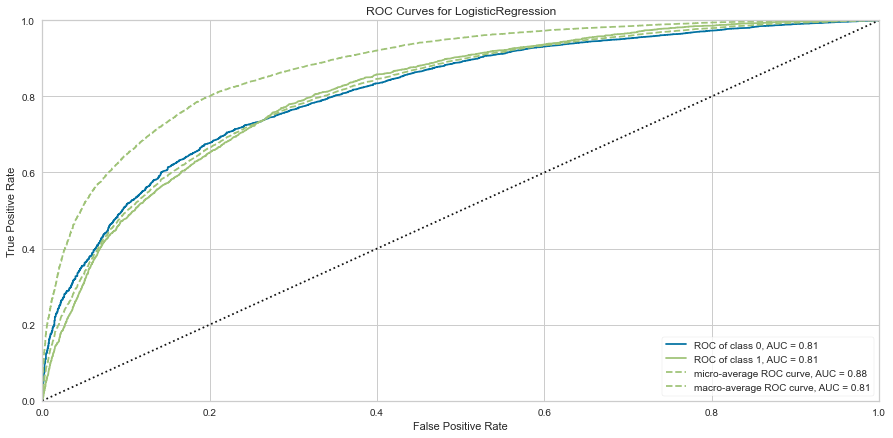

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [277]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(model, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

#### Decision Tree

In [278]:
## Decision Tree Classifier Algorithm
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_chi, y_train_chi)

y_pred_chi = classifier.predict(X_test_chi)
acc_chi = accuracy_score(y_test_chi, y_pred_chi)
train_acc_chi = accuracy_score(y_train_chi, classifier.predict(X_train_chi))
print('Decision Tree score for train data:', train_acc_chi * 100)
print('Decision Tree score for test data:', acc_chi * 100)
print('Classification Report')
print(cr(y_test_chi, y_pred_chi))
print('Confusion Matrix')
print(cm(y_test_chi, y_pred_chi))
model_result['DT_TOP5'] = "{:.4f}".format(acc_chi)
print('Printing Model Result Variable: {}'.format(model_result))

Decision Tree score for train data: 89.4030243645617
Decision Tree score for test data: 79.56049955640484
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11079
           1       0.60      0.50      0.54      3574

    accuracy                           0.80     14653
   macro avg       0.72      0.70      0.71     14653
weighted avg       0.79      0.80      0.79     14653

Confusion Matrix
[[9871 1208]
 [1787 1787]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232', 'LR_SS_FILTER': '0.8108', 'DT_SS_FILTER': '0.7844', 'RF_SS_FILTER': '0.8219', 'LR_TOP5': '0.7999', 'DT_TOP5': '0.7956', 'RF_TOP5': '0.8101'}


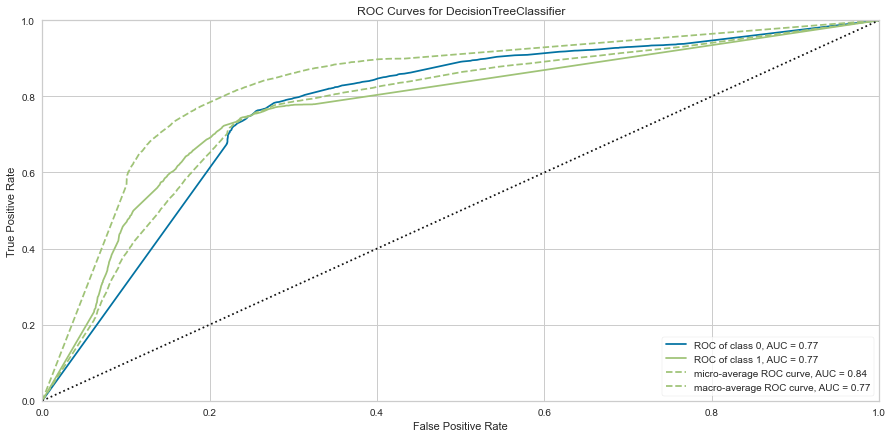

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [279]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

#### Random Forest

In [280]:
## Decision Tree Classifier Algorithm
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_chi, y_train_chi)

y_pred_chi = classifier.predict(X_test_chi)
acc_chi = accuracy_score(y_test_chi, y_pred_chi)
train_acc_chi = accuracy_score(y_train_chi, classifier.predict(X_train_chi))
print('Decision Tree score for train data:', train_acc_chi * 100)
print('Decision Tree score for test data:', acc_chi * 100)
print('Classification Report')
print(cr(y_test_chi, y_pred_chi))
print('Confusion Matrix')
print(cm(y_test_chi, y_pred_chi))
model_result['RF_TOP5'] = "{:.4f}".format(acc_chi)
print('Printing Model Result Variable: {}'.format(model_result))

Decision Tree score for train data: 89.4030243645617
Decision Tree score for test data: 80.86398689688117
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     11079
           1       0.63      0.53      0.57      3574

    accuracy                           0.81     14653
   macro avg       0.74      0.71      0.73     14653
weighted avg       0.80      0.81      0.80     14653

Confusion Matrix
[[9955 1124]
 [1680 1894]]
Printing Model Result Variable: {'LR_WO_SS': '0.7981', 'DT_WO_SS': '0.8214', 'RF_WO_SS': '0.8656', 'LR_SS': '0.8301', 'DT_SS': '0.8217', 'RF_SS': '0.8655', 'LR_WO_SS_FILTER': '0.8074', 'DT_WO_SS_FILTER': '0.7845', 'RF_WO_SS_FILTER': '0.8232', 'LR_SS_FILTER': '0.8108', 'DT_SS_FILTER': '0.7844', 'RF_SS_FILTER': '0.8219', 'LR_TOP5': '0.7999', 'DT_TOP5': '0.7956', 'RF_TOP5': '0.8086'}


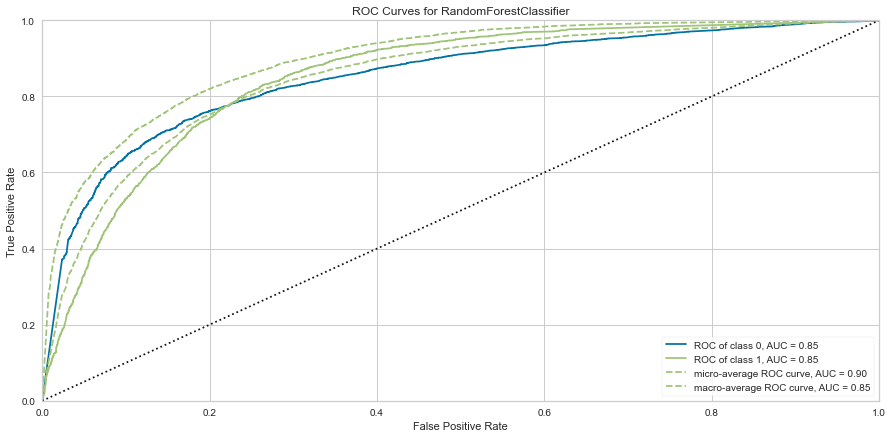

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [249]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

In [284]:
## Copy the dataframe into another dataframe
## Drop all the unwanted columns from the dataframe
income_df_4 = income_df.copy(deep=True)
income_df_4 = income_df_4.drop(['capital-gain','capital-loss','fnlwgt'],axis=1)

In [286]:
## Declaring the source and target for the modeling
X = income_df_4.iloc[:,0:-1]
y = income_df_4.iloc[:,-1]

In [287]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [290]:
## Declaring classifer
rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

In [291]:
feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: relationship                        Importance: 0.19766106037611972
Feature: educational-num                     Importance: 0.18348664687508173
Feature: age                                 Importance: 0.15403132911864692
Feature: marital-status                      Importance: 0.14480614267352443
Feature: hours-per-week                      Importance: 0.10116431536331184
Feature: occupation                          Importance: 0.07065071647518531
Feature: education                           Importance: 0.05174752777912453
Feature: workclass                           Importance: 0.040275673857927456
Feature: native-country                      Importance: 0.020808399245066403
Feature: gender                              Importance: 0.0199676266700648
Feature: race                                Importance: 0.015400561565946784


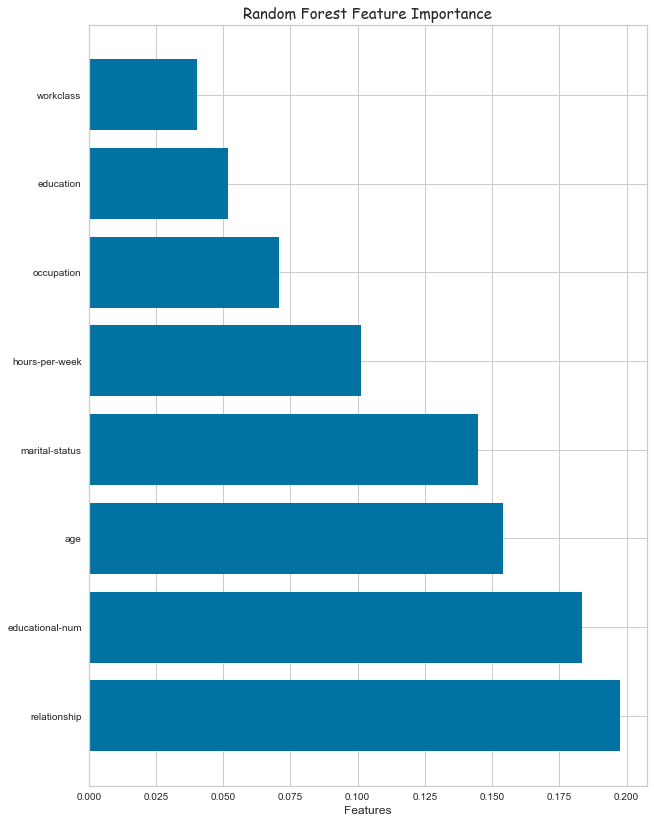

In [293]:
feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 15})
plt.xlabel('Features',fontdict= {'fontsize' : 12})
plt.show()